In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load datasets 
white_wine = pd.read_csv("F:\DataSciCAB\DataSci\wine\WineDataset\winequality-white.csv", sep=";")


In [4]:
#rename columns in red wine ds
for col in white_wine.columns:
    white_wine.rename(columns={col:col.lower().replace(" ","_")},inplace=True)
white_wine.head(0)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality


In [5]:
#removed datas

#so i have decided to remove all the wine samples with higher level of total sulfur dioxide 
white_wine.drop(white_wine[white_wine['total_sulfur_dioxide']>=210].index, inplace=True)


Feature Selection using correlations 

<AxesSubplot:>

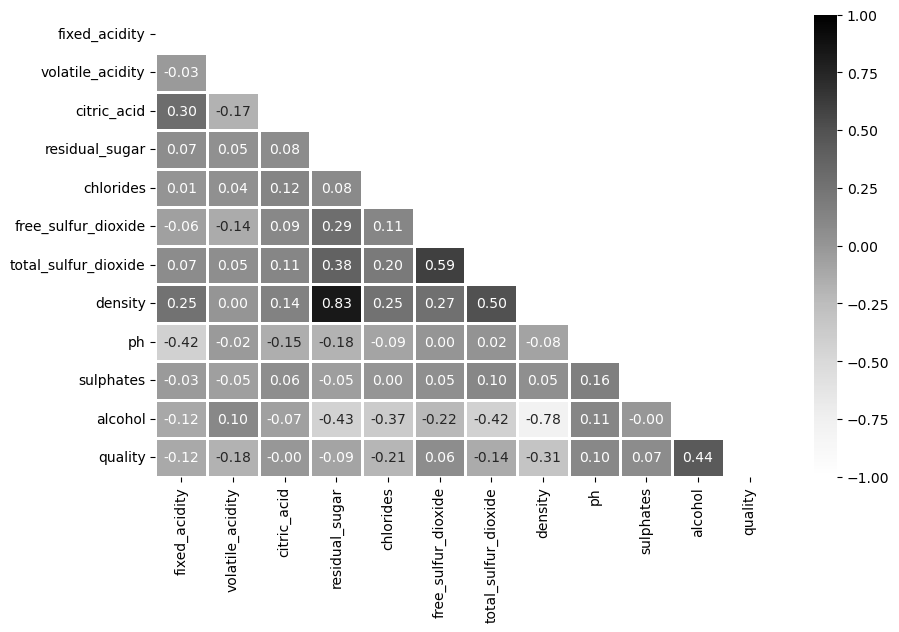

In [6]:

import warnings
warnings.filterwarnings('ignore')

# Create the correlation matrix on white wine 
plt.figure(figsize=(10,6))
corr_matrix = white_wine.corr()

# Create a mask to hide the upper triangle of the matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with the mask applied
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=2, mask=mask, cmap='Greys', vmax= 1, vmin=-1)



In [7]:
for a in range(len(white_wine.corr().columns)):
    for b in range(a):
        if abs(white_wine.corr().iloc[a,b]) >0.6:
            name = white_wine.corr().columns[a]
            print(name)

density
alcohol


In [8]:
#since alcohol is an important feature in the wine, so we only remove density.
white_wine=white_wine.drop('density',axis=1)


In [9]:
white_wine.head(0)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,ph,sulphates,alcohol,quality


Encodeding categorical values

In [10]:
#encoding wine quality with low, medium and high labeels
white_wine['label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <=6 else 'high')
white_wine.head()
white_wine["label"].value_counts()


medium    2074
low       1497
high      1042
Name: label, dtype: int64

In [11]:
#maping the labels to numbers 
white_wine['quality_label'] = white_wine.label.map({"low" : "0", "medium" : "1", "high" : "2"}).astype('int')
white_wine = white_wine.drop(columns=["label", "quality"]) 

white_wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,ph,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.0,0.45,8.8,1


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# define the features and target variable
X = white_wine.drop(['quality_label'], axis=1)
y = white_wine['quality_label']

# normalize the features
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

1 ***Logistic Regresion Model 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

lr = LogisticRegression()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model on the entire training data
lr.fit(X_train, y_train)

# Make predictions on the test data
predictions = lr.predict(X_test)

print('**** Logistic Regression Model****')

# Check the accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test, predictions))

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.54878049 0.57452575 0.55826558 0.56504065 0.56233062]
Mean cross-validation score: 0.5617886178861788
**** Logistic Regression Model****
Accuracy score: 0.6045503791982665
Cohen-Kappa score: 0.3548470491809558
Confusion matrix:


,low,medium,high
low,182,114,1
medium,80,302,39
high,14,117,74


Classification Report
              precision    recall  f1-score   support

         low       0.66      0.61      0.64       297
      medium       0.57      0.72      0.63       421
        high       0.65      0.36      0.46       205

    accuracy                           0.60       923
   macro avg       0.63      0.56      0.58       923
weighted avg       0.61      0.60      0.60       923



2 ***Decision Tree Model 

In [14]:

from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
predictions = dtc.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
print('**** Decision Tree Model****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.57452575 0.61924119 0.61788618 0.59891599 0.60298103]
Mean cross-validation score: 0.602710027100271
**** Decision Tree Model****
Accuracy: 0.6684723726977249
Cohen-Kappa score: 0.48369960624595554
Confusion matrix:


,low,medium,high
low,205,77,15
medium,73,277,71
high,12,58,135


Classification Report
              precision    recall  f1-score   support

         low       0.71      0.69      0.70       297
      medium       0.67      0.66      0.67       421
        high       0.61      0.66      0.63       205

    accuracy                           0.67       923
   macro avg       0.66      0.67      0.67       923
weighted avg       0.67      0.67      0.67       923



3 ***Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
predictions = rfc.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)
#print('**** Random Forest Model****')


# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
#print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

print("Accuracy:", accuracy)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.66666667 0.72222222 0.67208672 0.68563686 0.69241192]
Mean cross-validation score: 0.6878048780487805
Confusion matrix:


,low,medium,high
low,223,70,4
medium,65,323,33
high,10,63,132


Accuracy: 0.7345612134344529
Classification Report
              precision    recall  f1-score   support

         low       0.75      0.75      0.75       297
      medium       0.71      0.77      0.74       421
        high       0.78      0.64      0.71       205

    accuracy                           0.73       923
   macro avg       0.75      0.72      0.73       923
weighted avg       0.74      0.73      0.73       923



4 ***Naive Bayes Model 

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(gnb, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = gnb.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print('**** Naive Bayes Model ****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.42682927 0.47560976 0.41192412 0.42818428 0.45257453]
Mean cross-validation score: 0.4390243902439024
**** Naive Bayes Model ****
Accuracy: 0.4810400866738895
Cohen-Kappa score: 0.22377056375862503
Confusion matrix:


,low,medium,high
low,112,126,59
medium,61,183,177
high,13,43,149


Classification Report
              precision    recall  f1-score   support

         low       0.60      0.38      0.46       297
      medium       0.52      0.43      0.47       421
        high       0.39      0.73      0.51       205

    accuracy                           0.48       923
   macro avg       0.50      0.51      0.48       923
weighted avg       0.52      0.48      0.48       923



5 ***Support Vector Model 

In [22]:

from sklearn.svm import SVC



svc = SVC(kernel='rbf')

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = svc.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print('**** SVC Model ****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))


Cross-validation scores: [0.55555556 0.55420054 0.52439024 0.53794038 0.52168022]
Mean cross-validation score: 0.5387533875338754
**** SVC Model ****
Accuracy: 0.5698808234019501
Cohen-Kappa score: 0.2699676055608461
Confusion matrix:


,low,medium,high
low,163,133,1
medium,75,338,8
high,14,166,25


Classification Report
              precision    recall  f1-score   support

         low       0.65      0.55      0.59       297
      medium       0.53      0.80      0.64       421
        high       0.74      0.12      0.21       205

    accuracy                           0.57       923
   macro avg       0.64      0.49      0.48       923
weighted avg       0.61      0.57      0.53       923



6 *** AdaBoostClassifier Model

In [23]:
# define the base decision tree model for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


base_model = DecisionTreeClassifier()

# define the AdaBoostClassifier model
ada = AdaBoostClassifier(base_estimator=base_model)


# Apply cross-validation with 5 folds
cv_scores = cross_val_score(ada, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the classifier to the training data
ada.fit(X_train, y_train)

# Use the classifier to predict the wine type on the test data
predictions = ada.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, predictions)

print('**** AdaBoostClassifier Model ****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))


Cross-validation scores: [0.60569106 0.62466125 0.59078591 0.59078591 0.59891599]
Mean cross-validation score: 0.6021680216802168
**** AdaBoostClassifier Model ****
Accuracy: 0.6468039003250271
Cohen-Kappa score: 0.44419158800820135
Confusion matrix:


,low,medium,high
low,196,81,20
medium,87,283,51
high,17,70,118


Classification Report
              precision    recall  f1-score   support

         low       0.65      0.66      0.66       297
      medium       0.65      0.67      0.66       421
        high       0.62      0.58      0.60       205

    accuracy                           0.65       923
   macro avg       0.64      0.64      0.64       923
weighted avg       0.65      0.65      0.65       923



7 ***Neural Network Model

In [24]:

import warnings

from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

# define the neural network model
nm = MLPClassifier()

# Apply cross-validation with 5 folds
cv_scores = cross_val_score(nm, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Fit the model to the training data
nm.fit(X_train, y_train)

# Make predictions on the test data
predictions = nm.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, predictions)

print('**** Neural Network Model****')
print("Accuracy:", accuracy)

# Compute the Cohen-Kappa score
kappa = cohen_kappa_score(predictions, y_test)
print("Cohen-Kappa score:", kappa)

# Compute and display the confusion matrix
print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, predictions, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

# Display the classification report
print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Cross-validation scores: [0.57317073 0.56910569 0.51355014 0.56097561 0.54878049]
Mean cross-validation score: 0.5531165311653117
**** Neural Network Model****
Accuracy: 0.5633802816901409
Cohen-Kappa score: 0.29452184698951933
Confusion matrix:


,low,medium,high
low,177,112,8
medium,92,273,56
high,13,122,70


Classification Report
              precision    recall  f1-score   support

         low       0.63      0.60      0.61       297
      medium       0.54      0.65      0.59       421
        high       0.52      0.34      0.41       205

    accuracy                           0.56       923
   macro avg       0.56      0.53      0.54       923
weighted avg       0.56      0.56      0.56       923



Observation: 
As we can see Random Forest Model worked better so now we can improve it using hyperparameter 

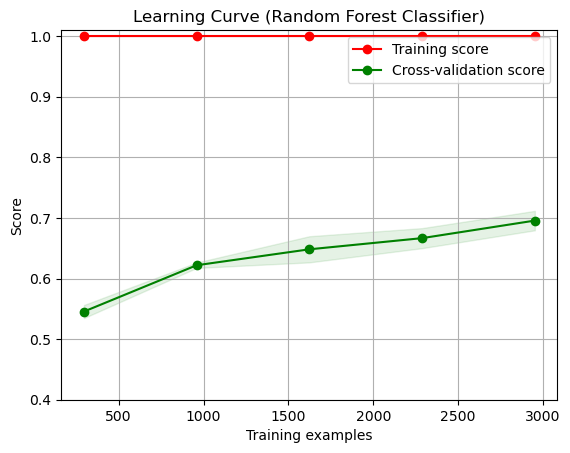

Mean cross-validation score: 0.6878048780487805


In [16]:
#to see the performance of rondom forest model which is our best model we can use learning curves 

from sklearn.model_selection import learning_curve

rfc = RandomForestClassifier()

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Define the parameters for the learning curve plot
title = "Learning Curve (Random Forest Classifier)"
cv = 5
n_jobs = -1
ylim = (0.4, 1.01)

# Call the plot_learning_curve function and display the plot
plot_learning_curve(rfc, title, X_train, y_train, ylim=ylim, cv=cv, n_jobs=n_jobs)
plt.show()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
predictions = rfc.predict(X_test)

print("Mean cross-validation score:", np.mean(cv_scores))

In [25]:
#Define the hyperparameters and their ranges to search over:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': ['None', 4, 6, 8],
    'min_samples_split': [2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', 'None'],
    'random_state': ['None', 42, 50],
    'min_samples_leaf' : [1, 3],


}

The param_grid is like a shopping list for the computer program that's going to help you make your wine quality predictions better. It has four things on the list that the program needs to know in order to find the best way to make predictions:

The first thing on the list is n_estimators. This is like telling the program how many people should be in the kitchen making the wine quality predictions. If there are too few people, the predictions might not be very accurate. If there are too many people, it might take too long to make the predictions. So we need to find the right number of people to make the predictions.

The second thing on the list is max_depth. This is like telling the program how deep to dig into the wine data to find the best way to make predictions. If we don't dig deep enough, we might miss some important information that could help us make better predictions. But if we dig too deep, we might find too much information that's not useful, and that could make the predictions worse.

The third thing on the list is min_samples_split. This is like telling the program how many samples of wine it needs to have before it splits the data into smaller groups to make predictions. If we don't have enough wine samples, the program might not be able to find patterns in the data. But if we have too many samples, it might take too long for the program to make predictions.

The fourth thing on the list is max_features. This is like telling the program which features of the wine to use to make the predictions. Features are things like the alcohol content, pH level, and acidity of the wine. If we use too many features, the program might get confused and make inaccurate predictions. But if we use too few features, we might miss important information that could help us make better predictions.

So, in summary, the param_grid is like a shopping list of things that the program needs to know in order to find the best way to make wine quality predictions. By tuning these parameters, we can find the best combination of settings that will make our predictions as accurate as possible.

In [26]:
#Create a random forest classifier object:
rfc_1 = RandomForestClassifier()

In [27]:
#Create a grid search object using the defined hyperparameters and search strategy:
from sklearn.model_selection import GridSearchCV, train_test_split
grid_search = GridSearchCV(estimator=rfc_1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [28]:
#Fit the grid search object to the training data:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': ['None', 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 150],
                         'random_state': ['None', 42, 50]},
             verbose=2)

In [51]:
#Extract the best hyperparameters and evaluate the model on the test set:
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



print(f'Best parameters: {grid_search.best_params_}')
print(f'Test set accuracy: {accuracy:.2f}')

print("Confusion matrix:")
labels = np.unique(y_test)
a = confusion_matrix(y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("low", "medium", "high"), columns=("low", "medium", "high"))
display(a)

print('Classification Report')
print(classification_report(y_test, predictions, target_names=["low","medium", "high"]))

Best parameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 50}
Test set accuracy: 0.63
Confusion matrix:


,low,medium,high
low,190,102,5
medium,74,325,22
high,13,127,65


Classification Report
              precision    recall  f1-score   support

         low       0.72      0.73      0.72       297
      medium       0.68      0.76      0.72       421
        high       0.76      0.56      0.65       205

    accuracy                           0.71       923
   macro avg       0.72      0.68      0.70       923
weighted avg       0.71      0.71      0.70       923



From above model we can see that the accuracy decreased after tuning the parameters, so we observe that the defult parameters are better.